<div style="background-color: darkred; padding: 10px; color: white;">

# Training Soma Classifier

</div>

<div style="background-color: darkblue; padding: 10px; color: white;">

## Section 1: Load Training Data
    
</div>

### Imports

In [1]:
from aind_exaspim_soma_detection.utils import util
from aind_exaspim_soma_detection.training import data_handling
from aind_exaspim_soma_detection.training.data_handling import SomaDataset

%matplotlib inline

### Initializations

In [2]:
# Parameters
anisotropy = [0.748, 0.748, 1.0]
multiscale = 2
patch_shape = (64, 64, 64)

# Paths
img_lookup_path =  "/root/capsule/data/exaspim_image_prefixes.json"
smartsheet_path = "/root/capsule/data/Neuron_Reconstructions.xlsx"
exaspim_soma_path = "/root/capsule/data/exaspim_somas_2024"


### Load Data

In [3]:
# SmartSheet Data
smartsheet_data = data_handling.fetch_smartsheet_somas(
    smartsheet_path,
    img_lookup_path,
    multiscale=multiscale,
)

# ExaSPIM Soma Data
exapsim_data = data_handling.fetch_exaspim_somas_2024(
    exaspim_soma_path,
    img_lookup_path,
    multiscale=multiscale,
)

# Initialize Dataset
soma_dataset = SomaDataset(patch_shape, transform=True)
for example_tuple in smartsheet_data + exapsim_data:
    soma_dataset.ingest_examples(*example_tuple)

print("# Examples:", soma_dataset.n_examples())
print("# Positive Examples", soma_dataset.n_positive_examples())
print("# Negative Examples", soma_dataset.n_negative_examples())

/opt/conda/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


# Examples: 2677
# Positive Examples 1884
# Negative Examples 793


### Visualize Training Example

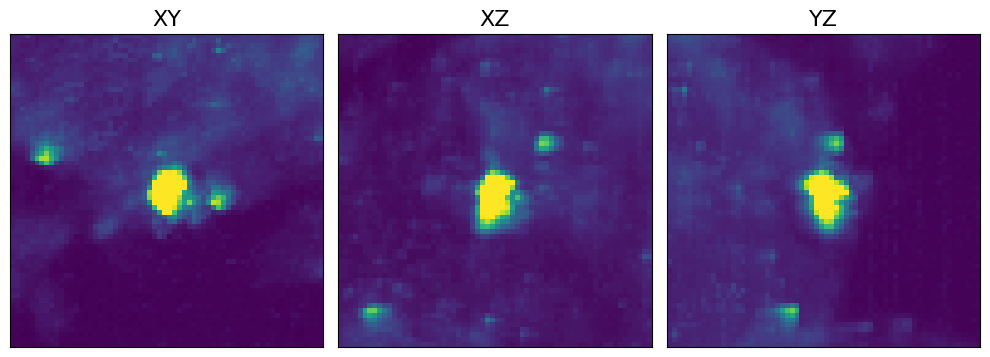

In [4]:
key = util.sample_once(soma_dataset.examples.keys())
soma_dataset.visualize_example(key)

### Visualize Augmented Training Example

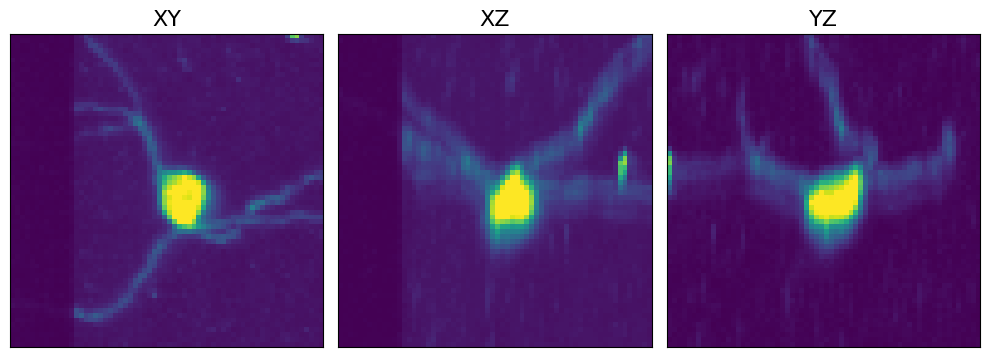

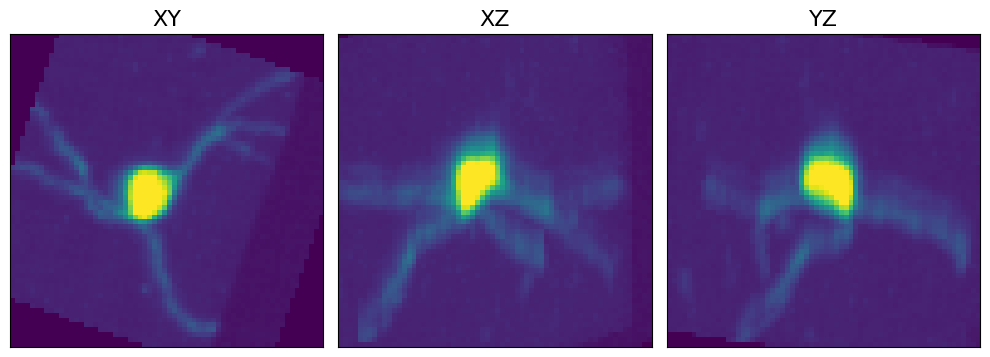

In [5]:
key = util.sample_once(soma_dataset.examples.keys())
soma_dataset.visualize_augmented_example(key)

<div style="background-color: darkblue; padding: 10px; color: white;">

## Section 2: Train Model
    
</div>